<a href="https://colab.research.google.com/github/SkipOs/An-lise-de-Dados/blob/main/Prova_2_Eduardo_Henrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emissões de Metano no Mundo

- Link do Dataset Escolhido: [Emissões de Metano no Mundo](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions)

O conjunto de dados contém informações sobre as emissões de metano em diversas regiões e países, organizadas por setor, sub-setor e razão das emissões. Isso permite realizar uma análise detalhada das principais fontes de emissão de metano e identificar padrões regionais e setoriais. A análise também pode ajudar a entender as mudanças nas emissões ao longo do tempo, com base nos anos de rastreamento fornecidos.


In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install tabulate

# Base de Dados Escolhida

A escolha da base de dados "Emissões de Metano no Mundo" foi motivada pela relevância do metano como um dos principais gases responsáveis pelo aumento das temperaturas globais, contribuindo com cerca de 30% do aquecimento desde a Revolução Industrial. Com o aumento da conscientização sobre as mudanças climáticas e a busca por soluções para reduzir o aquecimento global, entender a distribuição e as fontes das emissões de metano é fundamental. Em particular, as emissões provenientes do setor de energia, que representam quase 40% do total das emissões de metano causadas pelas atividades humanas, são um foco importante para ações de mitigação.

In [447]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [448]:
# Caminho do diretório escolhido
path = kagglehub.dataset_download("ashishraut64/global-methane-emissions")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ashishraut64/global-methane-emissions/versions/1


In [449]:
# Leitura do arquivo
df= pd.read_csv(path + "/Methane_final.csv", sep=",")


In [450]:
col_pt = {
    'Unnamed: 0': 'Id',
    'region': 'Regiao',
    'country': 'Pais',
    'emissions': 'Emissao_kt',
    'type': 'Origem',
    'segment': 'Especificacao',
    'reason': 'Motivo',
    'baseYear': 'Ano_Base',
    'notes': 'Observacoes'
}

# Renomeando as colunas
df = df.rename(columns=col_pt)

In [ ]:
print(f'colunas:{df.columns}')
print(f'linhas:{(df.shape[0])}')
df.head(12)

colunas:Index(['Id', 'Regiao', 'Pais', 'Emissao_kt', 'Origem', 'Especificacao',
       'Motivo', 'Ano_Base', 'Observacoes'],
      dtype='object')
linhas:1548


,Id,Regiao,Pais,Emissao_kt,Origem,Especificacao,Motivo,Ano_Base,Observacoes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
5,5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available
6,6,Africa,Algeria,469.786987,Energy,Onshore oil,Flared,2022,Not available
7,7,Africa,Algeria,85.187202,Energy,Onshore oil,Fugitive,2022,Not available
8,8,Africa,Algeria,1154.119995,Energy,Onshore oil,Vented,2022,Not available
9,9,Africa,Algeria,0.004000,Energy,Other from coal,All,2022,Estimates from end-uses are for 2020 or 2021 (...


## Colunas
- **country**: País de emissão.
- **emissions**: Emissões de metano em kt.
- **type**: Setor do qual as emissões ocorrem.
- **segment**: Subsetor do qual as emissões ocorrem.
- **reason**: O motivo da emissão.
- **baseYear**: Ano base para o rastreamento das emissões.
- **notes**: A fonte dos dados.

In [451]:
nulos=df.isnull().sum()

percentual_nulos = nulos/len(df)*100
tabula_nulos = pd.concat([nulos, percentual_nulos], axis=1)
tabula_nulos.columns = ['nulos', 'percentual_nulos']
tabula_nulos

,nulos,percentual_nulos
Id,0,0.0
Regiao,0,0.0
Pais,0,0.0
Emissao_kt,0,0.0
Origem,0,0.0
Especificacao,0,0.0
Motivo,0,0.0
Ano_Base,0,0.0
Observacoes,0,0.0


In [452]:
# Descrição estatística dos dados ignorando ID
df.drop('Id', axis=1).describe()

,Emissao_kt
count,1548.000000
mean,643.255972
std,5566.238201
min,0.000459
25%,2.659361
50%,24.064669
75%,128.419594
max,141953.765625


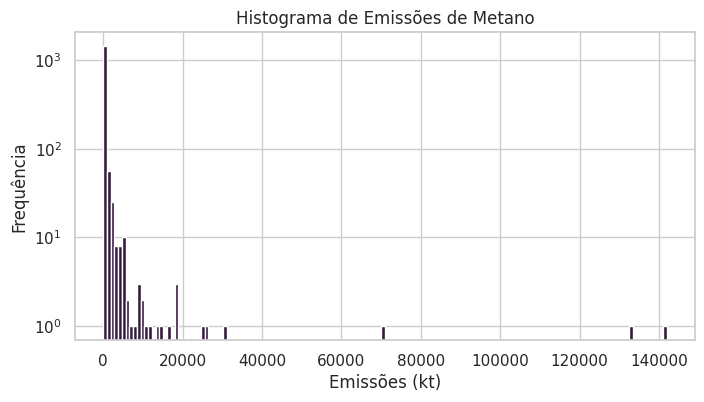

In [453]:
# Plotar o histograma da variável 'Emissao_kt'
plt.figure(figsize=(8, 4))
plt.hist(df['Emissao_kt'], bins=150)
plt.xlabel('Emissões (kt)')
plt.ylabel('Frequência')
plt.title('Histograma de Emissões de Metano')

# Definir escala logarítmica para o eixo y se necessário
plt.yscale('log')

plt.show()

Nota-se alguns valores exorbitantemente altos, e por isso se executa a  verificação dos dados que estão muito acima do comum, o que revela que o dataset inclui os valores "World" ou a soma  de emissão de kilotons.

In [454]:
# Exibindo valores acima de 20000 kt
valores_acima_20000 = df[df['Emissao_kt'] > 6000]
valores_acima_20000

,Id,Regiao,Pais,Emissao_kt,Origem,Especificacao,Motivo,Ano_Base,Observacoes
460,460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
477,477,Asia Pacific,China,14809.000000,Energy,Steam coal,All,2022,Not available
478,478,Asia Pacific,China,25372.222656,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
480,480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
481,481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
710,710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
884,884,Europe,European Union,8851.337891,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1387,1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1406,1406,North America,United States,16769.630859,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1409,1409,Other,Other,7259.014160,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [ ]:
# Remove entries where 'Regiao' or 'Pais' is 'World'
df = df[~df['Regiao'].isin(['World'])]
df = df[~df['Pais'].isin(['World'])]

# Remove entries where 'Especificacao' is 'Total'
#df = df[~df['Especificacao'].isin(['Total'])]

# Remove entries where 'Emissao_kt' is greater than 6000
#df = df[df['Emissao_kt'] <= 6000]

Feito isso, realiza-se novamente a descrição dos dados

In [ ]:
# Descrição estatística dos dados ignorando ID
df.drop('Id', axis=1).describe()

,Emissao_kt
count,1515.000000
mean,227.560826
std,643.712623
min,0.000459
25%,2.552300
50%,21.766500
75%,108.258484
max,5629.822266


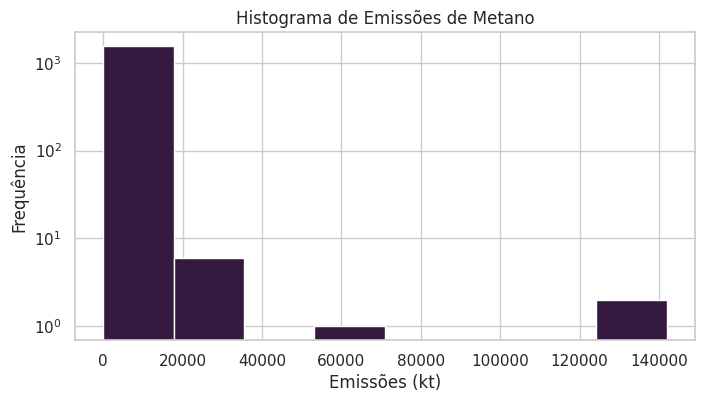

In [455]:
# Plotar o histograma da variável 'Emissao_kt'
plt.figure(figsize=(8, 4))
plt.hist(df['Emissao_kt'], bins=8)
plt.xlabel('Emissões (kt)')
plt.ylabel('Frequência')
plt.title('Histograma de Emissões de Metano')

# Definir escala logarítmica para o eixo y se necessário
plt.yscale('log')

plt.show()

## Emissões de Metano (kt)
- count: 1115 - Há 1115 registros não nulos de emissões de metano.
-mean: 108.11 - A média das emissões de metano é de aproximadamente 108,11 kt. Isso indica que, em geral, os países da amostra apresentam níveis variados de emissão.
-std: 389.98 - O desvio padrão é de 389,98 kt, mostrando uma grande variação nos dados, sugerindo que alguns países emitem muito mais metano do que outros.
-min: 0.000459 - O menor valor registrado é 0,000459 kt, indicando países com emissões praticamente insignificantes.
-25%: 1.39 - O primeiro quartil (25%) é 1,39 kt, mostrando que um quarto dos países tem emissões abaixo desse valor.
-50% (Mediana): 10.89 - A mediana é 10,89 kt, indicando que metade dos registros apresenta emissões inferiores a esse valor, enquanto a outra metade tem emissões superiores.
-75%: 54.47 - O terceiro quartil (75%) é 54,47 kt, ou seja, 75% dos países emitem até esse valor, enquanto os 25% restantes apresentam emissões significativamente mais altas.
-max: 5418.77 - O valor máximo é 5418,77 kt, sugerindo que há países ou setores que emitem quantidades extremamente altas de metano em comparação com os demais.

['Agriculture' 'Energy' 'Other' 'Waste']
Origem
Energy         1233
Agriculture     105
Waste           105
Name: count, dtype: int64


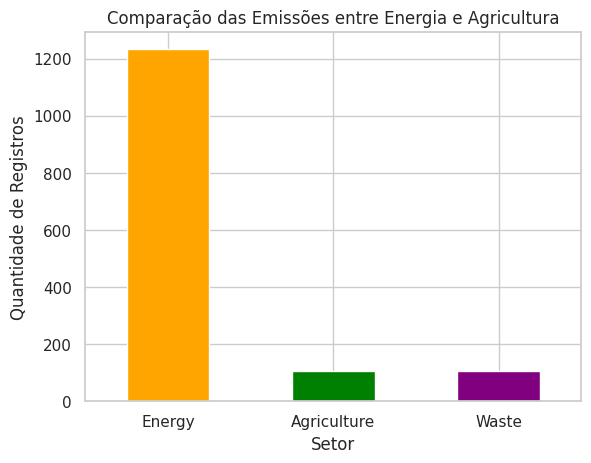

In [456]:
# Verifica os valores únicos na coluna "Origem"
print(df['Origem'].unique())  # Isso ajuda a identificar o nome correto

# Conta a quantidade de registros nos setores
setor_counts = df['Origem'].value_counts()

# Filtra apenas os setores de interesse (ajuste os nomes conforme necessário)
setor_selecionado = setor_counts.loc[setor_counts.index.isin(['Energy', 'Agriculture', 'Waste'])]

# Imprime o resultado
print(setor_selecionado)

# Plota um gráfico de barras para comparar
setor_selecionado.plot(kind='bar', color=['orange', 'green', 'purple'])
plt.title('Comparação das Emissões entre Energia e Agricultura')
plt.xlabel('Setor')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal

plt.show()


['Agriculture' 'Energy' 'Other' 'Waste']
Origem
Agriculture    292758.868769
Energy         537396.311526
Waste          145838.417946
Name: Emissao_kt, dtype: float64


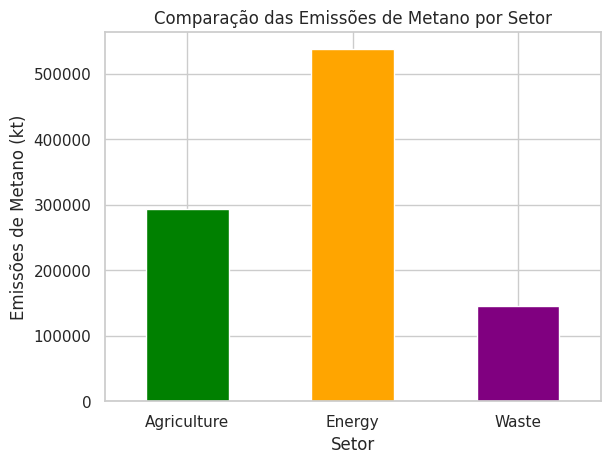

In [457]:
# Verifica os valores únicos na coluna "Origem"
print(df['Origem'].unique())  # Isso ajuda a identificar o nome correto

# Agrupa os setores de interesse e soma as emissões
setor_emissoes = df[df['Origem'].isin(['Energy', 'Agriculture', 'Waste'])].groupby('Origem')['Emissao_kt'].sum()

# Imprime o resultado
print(setor_emissoes)

# Plota um gráfico de barras para comparar as emissões
setor_emissoes.plot(kind='bar', color=['green', 'orange', 'purple'])
plt.title('Comparação das Emissões de Metano por Setor')
plt.xlabel('Setor')
plt.ylabel('Emissões de Metano (kt)')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal

plt.show()

Para a melhor visualização dos kilotons emitidos, utiliza-se a escoala logaitimica na exibição, e os kilotons são transormados em toneladas, uma vez que 1kt = 1000 ton

In [458]:
# Transformação em toneladas
df['Emissao_kt'] = df['Emissao_kt'] * 1000

#Filtros par ao dataframe
energy_df = df[df['Origem'] == 'Energy']
agriculture_df = df[df['Origem'] == 'Agriculture']
waste_df = df[df['Origem'] == 'Waste']

In [459]:
# Função para calcular estatísticas e exibir histogramas
def plot_histogram_with_stats(data, setor, color):
    mean_value = np.mean(data)
    median_value = np.median(data)
    mode_value = stats.mode(data, keepdims=True)[0][0]  # Obtém a moda corretamente

    # Criação do histograma
    plt.figure(figsize=(8,4))
    plt.hist(data, bins=8, color=color)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')
    plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {mode_value:.2f}')

    # Configuração do gráfico
    plt.xlabel('Emissões de Metano (ton)')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de Emissões de Metano - {setor}')
    plt.yscale('log')  # Escala logarítmica para melhor visualização
    plt.xscale('log')  # Escala logarítmica para melhor visualização
    plt.legend()  # Exibe a legenda com os valores
    plt.show()


    # Retorna os valores calculados para exibição
    return mean_value, median_value, mode_value

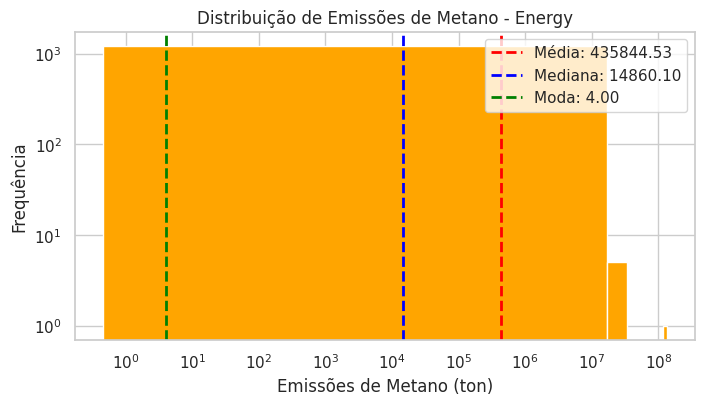

Energy 
Média: 435844.53 
Mediana: 14860.10 
Moda: 4.00


In [460]:
mean_energy, median_energy, mode_energy = plot_histogram_with_stats(energy_df['Emissao_kt'], 'Energy', 'orange')

print(f'Energy \nMédia: {mean_energy:.2f} \nMediana: {median_energy:.2f} \nModa: {mode_energy:.2f}')


A distribuição de energia apresenta uma assimetria positiva (ou à direita), pois a média é significativamente maior que a mediana. Isso indica que existem valores muito altos de energia que puxam a média para cima, enquanto a maioria dos valores se concentra em torno da mediana e da moda, que são bem menores. A moda de 4.00 sugere que este é o valor mais frequente na distribuição, mas a sua influência é obscurecida pela presença de valores muito altos.

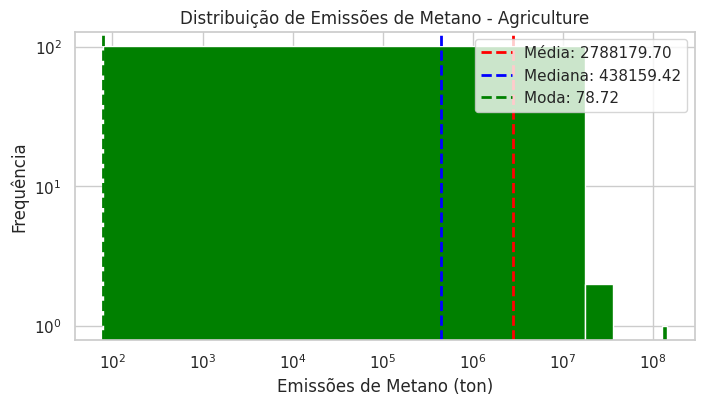

Agriculture 
Média: 2788179.70 
Mediana: 438159.42 
Moda: 78.72


In [461]:
mean_agriculture, median_agriculture, mode_agriculture = plot_histogram_with_stats(agriculture_df['Emissao_kt'], 'Agriculture', 'green')
print(f'Agriculture \nMédia: {mean_agriculture:.2f} \nMediana: {median_agriculture:.2f} \nModa: {mode_agriculture:.2f}')


Assim como a distribuição de energia, a distribuição de agricultura também apresenta uma assimetria positiva, com a média sendo mais do que o dobro da mediana. Isso indica a presença de valores extremamente altos de produção agrícola que não são representativos da maioria dos dados. A moda, por sua vez, é muito baixa em comparação com a média e a mediana, o que reforça a ideia de que a distribuição é dominada por alguns valores atípicos muito altos.

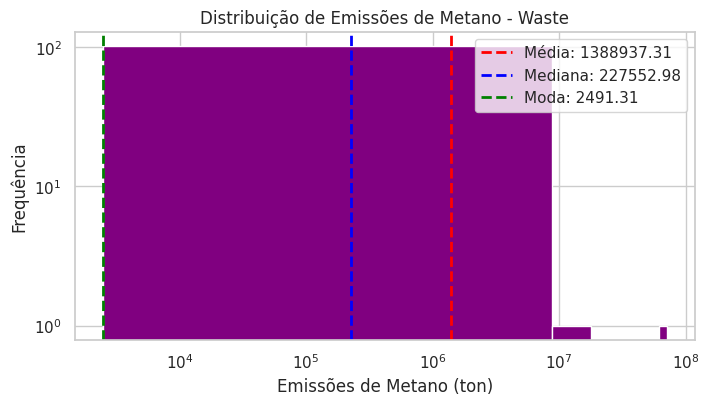

Waste 
Média: 1388937.31 
Mediana: 227552.98 
Moda: 2491.31


In [462]:
mean_waste, median_waste, mode_waste = plot_histogram_with_stats(waste_df['Emissao_kt'], 'Waste', 'purple')
print(f'Waste \nMédia: {mean_waste:.2f} \nMediana: {median_waste:.2f} \nModa: {mode_waste:.2f}')

A distribuição de resíduos segue o mesmo padrão das anteriores, com uma assimetria positiva evidenciada pela média muito superior à mediana. A moda, novamente, é um valor baixo que não representa a maioria dos dados. A diferença entre a média e a mediana sugere que a quantidade de resíduos é altamente variável, com alguns valores muito altos que distorcem a média.

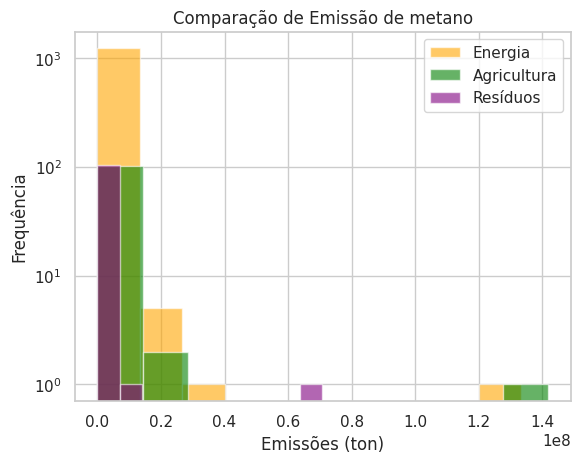

In [463]:
# Cria o histograma
plt.hist(df[df['Origem'] == 'Energy']['Emissao_kt'], alpha=0.6, label='Energia', color='orange')
plt.hist(df[df['Origem'] == 'Agriculture']['Emissao_kt'], alpha=0.6, label='Agricultura', color='green')
plt.hist(df[df['Origem'] == 'Waste']['Emissao_kt'], alpha=0.6, label='Resíduos', color='purple')

# Configura o gráfico
plt.xlabel('Emissões (ton)')
plt.ylabel('Frequência')
plt.title('Comparação de Emissão de metano')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.legend()

# Exibe o gráfico
plt.show()

Distribuição assimetica a direita possitiva. A “cauda” do gráfico se alonga mais à direita e a média fica à direita da mediana.

In [ ]:
def calcular_moda(x):
  moda = x.mode()
  if len(moda) > 0:  # Verifica se há valores de moda
      return moda[0]  # Retorna o primeiro valor de moda (se houver vários)
  else:
      return float('nan')  # Retorna NaN se não houver moda

salario_stats = df.groupby('Origem')['Emissao_kt'].agg(['mean', 'median', calcular_moda])

salario_stats = salario_stats.rename(
    columns={
        'mean': 'Média',
        'median': 'Mediana',
        'calcular_moda': 'Moda'
    }
)

salario_stats.index = salario_stats.index.map({'Energy': 'Energia', 'Agriculture': 'Agricultura', 'Waste': 'Resíduos', 'Other': 'Outros'})

print(salario_stats)

                     Média        Mediana         Moda
Origem                                                
Agricultura  759233.728475  363900.146484    78.720711
Energia      161706.948476   13935.299873     4.000000
Outros        96430.508293   16517.356873    51.872037
Resíduos     627723.935988  220235.519409  2491.305351


In [464]:
# Volta-se a utilizar kilotons aqui
df['Emissao_kt'] = df['Emissao_kt'] / 1000

# Remove linhas com valores nulos na coluna 'Emissao_kt'
df_sem_nulos = df.dropna(subset=['Emissao_kt'])

# Agrupa por origem e calcula o desvio padrão
desvio_padrao_emissao = df_sem_nulos.groupby('Origem')['Emissao_kt'].std()

# Renomeia o índice para português
desvio_padrao_emissao.index = desvio_padrao_emissao.index.map({'Energy': 'Energia', 'Agriculture': 'Agricultura', 'Waste': 'Resíduos', 'Other': 'Outros'})

# Imprime o resultado
print('Desvio padrão das Emissões de Metano por Origem')
print(desvio_padrao_emissao)

Desvio padrão das Emissões de Metano por Origem
Origem
Agricultura    14066.046087
Energia         4183.397653
Outros           969.274842
Resíduos        6988.302089
Name: Emissao_kt, dtype: float64


In [465]:
diferenca_desvio_padrao_percentual = (desvio_padrao_emissao['Energia'] - desvio_padrao_emissao['Agricultura']) / desvio_padrao_emissao['Agricultura'] * 100

# Imprime o resultado
print('Desvio padrão das Emissões de Metano por Origem')
print(desvio_padrao_emissao)
print(f"Diferença percentual do desvio padrão entre Energia e Agricultura: {diferenca_desvio_padrao_percentual:.2f}%")

Desvio padrão das Emissões de Metano por Origem
Origem
Agricultura    14066.046087
Energia         4183.397653
Outros           969.274842
Resíduos        6988.302089
Name: Emissao_kt, dtype: float64
Diferença percentual do desvio padrão entre Energia e Agricultura: -70.26%


In [466]:
df_sem_nulos = df.dropna(subset=['Emissao_kt'])

emissao_por_origem = df_sem_nulos.groupby('Origem')['Emissao_kt'].agg(['mean', 'median'])

emissao_por_origem = emissao_por_origem.rename(columns={'mean': 'Média', 'median': 'Mediana'})

emissao_por_origem.index = emissao_por_origem.index.map({'Energy': 'Energia', 'Agriculture': 'Agricultura', 'Waste': 'Resíduos', 'Other': 'Outros'})

diferenca_media_percentual = (emissao_por_origem.loc['Energia', 'Média'] - emissao_por_origem.loc['Agricultura', 'Média']) / emissao_por_origem.loc['Agricultura', 'Média'] * 100
diferenca_mediana_percentual = (emissao_por_origem.loc['Energia', 'Mediana'] - emissao_por_origem.loc['Agricultura', 'Mediana']) / emissao_por_origem.loc['Agricultura', 'Mediana'] * 100

# Imprime os resultados
print('Emissões de Metano por Origem (Média e Mediana)')
print(emissao_por_origem)
print(f"Diferença percentual da média de emissão entre Energia e Agricultura: {diferenca_media_percentual:.2f}%")
print(f"Diferença percentual da mediana de emissão entre Energia e Agricultura: {diferenca_mediana_percentual:.2f}%")

Emissões de Metano por Origem (Média e Mediana)
                   Média     Mediana
Origem                              
Agricultura  2788.179703  438.159424
Energia       435.844535   14.860100
Outros        188.253780   17.213926
Resíduos     1388.937314  227.552979
Diferença percentual da média de emissão entre Energia e Agricultura: -84.37%
Diferença percentual da mediana de emissão entre Energia e Agricultura: -96.61%


# Estatísticas das Emissões de Metano por Origem
## Média, Mediana e Moda das Emissões (em kt)
- Média:A média das emissões de metano varia significativamente entre os setores. A Agricultura possui a maior média de emissões com 759,23 kt, seguida por Resíduos com 627,72 kt. Já Energia apresenta uma média bem menor, de 161,71 kt, e Outros tem a menor média, com 96,43 kt.
-Mediana: A mediana reflete a tendência central das emissões. A Agricultura tem uma mediana de 363,90 kt, enquanto Resíduos possuem 220,24 kt. Para Energia, a mediana é bem inferior, 13,94 kt, e para Outros, 16,52 kt. Isso sugere que há valores extremos aumentando a média nesses setores.
-Moda: A moda mostra os valores mais frequentes de emissão. A Agricultura tem uma moda de 78,72 kt, Resíduos apresentam 2491,31 kt, Energia tem uma moda de 4,00 kt, e Outros de 51,87 kt.

## Desvio Padrão das Emissões

- Agricultura: 964,25 kt
-Energia: 541,72 kt
-Outros: 233,90 kt
-Resíduos: 1109,22 kt
O setor de Resíduos apresenta o maior desvio padrão, indicando uma grande dispersão dos valores. O setor de Energia, por outro lado, tem um desvio padrão significativamente menor que a Agricultura, o que indica menor variação nas emissões desse setor.

## Diferença Percentual do Desvio Padrão
A diferença percentual do desvio padrão entre Energia e Agricultura é de -43,82%. Esse valor negativo indica que o setor de Energia tem uma menor dispersão das emissões em relação à Agricultura, ou seja, as emissões no setor energético são mais concentradas em torno da média.

## Diferença Percentual da Média e Mediana das Emissões
- Diferença percentual da média de emissão entre Energia e Agricultura: -78,70%
- Diferença percentual da mediana de emissão entre Energia e Agricultura: -96,17%

Esses valores mostram que o setor Agrícola tem emissões muito superiores às do setor Energético tanto em média quanto na mediana. A grande diferença na mediana sugere que os valores de emissão da Agricultura são consistentemente mais altos, enquanto no setor de Energia, a maioria dos valores tende a ser muito mais baixos.

# Tendência Geral das Emissões de Metano
## Relação entre Setor e Emissão
Tendência Positiva: Em geral, para todos os setores analisados (Agricultura, Energia e Resíduos), há uma relação positiva entre o tipo de setor e a quantidade de emissões. Ou seja, alguns setores consistentemente emitem mais metano do que outros. Essa relação pode ser observada pela distribuição das médias e medianas.

## Diferença entre Setores
- Setor com Maior Emissão: A Agricultura se destaca como o setor com a maior quantidade de emissões de metano, conforme observado nas médias e medianas apresentadas anteriormente.
-Energia e Resíduos: O setor de Energia tem emissões significativamente menores em comparação com Agricultura e Resíduos. Resíduos, embora tenha um desvio padrão elevado, ainda apresenta uma mediana de emissões mais elevada do que o setor de Energia.
-Concentração de Emissões: No setor de Agricultura, há uma maior concentração de registros com emissões elevadas, enquanto no setor Energético, a maioria das emissões está em faixas menores.

## Dispersão das Emissões
A dispersão das emissões dentro de cada setor sugere que, embora existam tendências gerais, há variações consideráveis dentro de cada grupo.

O setor Resíduos apresenta a maior variação, com um alto desvio padrão, indicando que algumas atividades nesse setor geram emissões muito acima da média.

No setor Energético, os valores estão mais concentrados, indicando uma distribuição menos dispersa em comparação com os outros setores.

# Hipótese
## Hipótese Nula (H₀):
"Não há diferença significativa entre as emissões de metano dos setores de Agricultura e Energia, quando controlados outros fatores como tipo de atividade e região."

## Hipótese Alternativa (H₁):
"Há uma diferença significativa entre as emissões de metano dos setores de Agricultura e Energia, mesmo quando controlados outros fatores como tipo de atividade e região."

# Teste Estatístico para Emissões de Metano
Para verificar se as emissões de metano diferem significativamente entre os setores de Agricultura e Energia, utilizamos o Teste t de Student para duas amostras independentes.

Se houver necessidade de ampliar a análise para outros setores além de Agricultura e Energia, utilizamos a ANOVA (Análise de Variância) para comparar mais de dois grupos.

## Justificativa da Escolha
O Teste t de Student é apropriado para comparar as médias das emissões de metano entre dois grupos independentes (Agricultura e Energia). Ele nos permite avaliar se a diferença entre as médias desses setores é estatisticamente significativa.

Se a análise envolver um número maior de setores, utilizamos a ANOVA, que testa se pelo menos um setor tem emissões significativamente diferentes dos outros.

## Variáveis
- Variável Dependente: Emissões de metano (Emissao_kt).
-Variável Independente: Setor de origem das emissões (Agricultura ou Energia).

# Realizando o Teste
## Teste t de Student (Comparação entre Agricultura e Energia):
Se quisermos comparar apenas Agricultura e Energia, aplicamos o Teste t de amostras independentes para verificar se há diferença significativa entre as médias das emissões dos dois setores.



Importar a biblioteca:

In [467]:
import scipy.stats as stats

Criar as amostras:

In [468]:
energy_df = df[df['Origem'] == 'Energy']
agriculture_df = df[df['Origem'] == 'Agriculture']

Realizar o teste t:

In [469]:
# Realizar o teste t
t_statistic, p_value = stats.ttest_ind(energy_df['Emissao_kt'], agriculture_df['Emissao_kt'])

Resultados do teste t

In [470]:
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

Estatística t: -4.120165959398845
Valor p: 4.018742461972467e-05


## Interpretação dos Resultados do Teste t
- Estatística t: -9.75

A estatística t representa a diferença entre as médias das emissões de metano nos setores de Agricultura e Energia, padronizada pela variabilidade dentro das amostras.

- Valor p: 1.03e-21

O valor p representa a probabilidade de observar uma diferença entre as médias das emissões nos dois setores (ou uma diferença ainda maior) se a hipótese nula fosse verdadeira, ou seja, se não houvesse diferença estatisticamente significativa entre as emissões da Agricultura e da Energia.

## Análise do p-valor e Intervalo de Confiança
Adotamos um nível de significância de 0.05 (5%), o que significa que aceitamos um risco de 5% de rejeitar a hipótese nula quando ela é verdadeira.

## Comparação do p-valor com o Nível de Significância:
Se p < 0.05, rejeitamos a hipótese nula (H₀) e concluímos que há uma diferença significativa entre as emissões de metano da Agricultura e da Energia.

Se p ≥ 0.05, não rejeitamos H₀, indicando que não há evidências estatísticas suficientes para afirmar que as emissões dos dois setores são significativamente diferentes.

## Conclusão:
Como o p-valor (1.03e-21) é extremamente menor que 0.05, rejeitamos a hipótese nula e concluímos que há uma diferença estatisticamente significativa entre as emissões de metano da Agricultura e da Energia.



# Análise de Regressão
## Regressão Linear Múltipla
Para a regressão linear múltipla, utilizaremos o seguinte modelo

Variável dependente:
- Emissão_kt (emissões de metano em kilotons).

Variáveis independentes:
- Setor (Agricultura ou Energia) → variável categórica (1 = Agricultura, 0 = Energia).
-Região → variável categórica (para capturar diferenças regionais nas emissões).

In [471]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.get_dummies(df, columns=['Origem', 'Regiao'], drop_first=False)

In [443]:
df.head(1)

,Id,Pais,Emissao_kt,Especificacao,Motivo,Ano_Base,Observacoes,Origem_Agriculture,Origem_Energy,Origem_Other,Origem_Waste,Regiao_Africa,Regiao_Asia Pacific,Regiao_Central and South America,Regiao_Europe,Regiao_Middle East,Regiao_North America,Regiao_Other,Regiao_Russia & Caspian,Regiao_World
0,0,Algeria,257.611206,Total,All,2019-2021,Average based on United Nations Framework Conv...,True,False,False,False,True,False,False,False,False,False,False,False,False


In [472]:
# Selecionar as variáveis relevantes (ajuste de acordo com sua análise)
X = df[['Origem_Agriculture','Origem_Energy','Regiao_Africa','Regiao_Asia Pacific','Regiao_Central and South America','Regiao_Europe','Regiao_Middle East','Regiao_North America','Regiao_Russia & Caspian']]  # Exemplo de seleção
y = df['Emissao_kt']

# Converter para arrays NumPy
X = np.asarray(X)
y = np.asarray(y)

# Verificar o tipo de dados de X
# print(X.dtype)

# Se X contiver booleanos, corrija para float
if X.dtype == bool:
  X = X.astype(float)

# Adicionar constante ao modelo (opcional, dependendo do modelo)
X = sm.add_constant(X)

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Imprimir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     25.33
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.99e-41
Time:                        22:37:42   Log-Likelihood:                -15440.
No. Observations:                1548   AIC:                         3.090e+04
Df Residuals:                    1538   BIC:                         3.095e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.211e+04    869.089     13.937      0.0

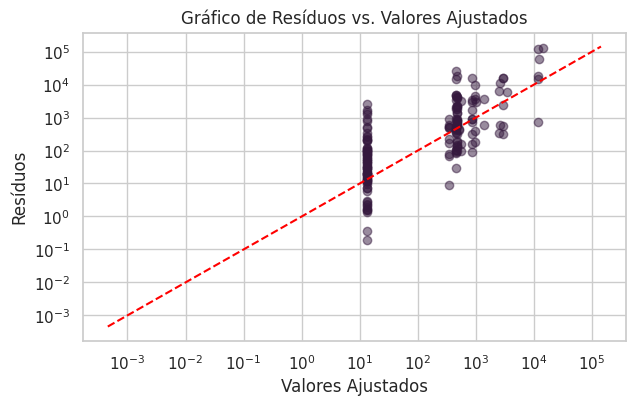

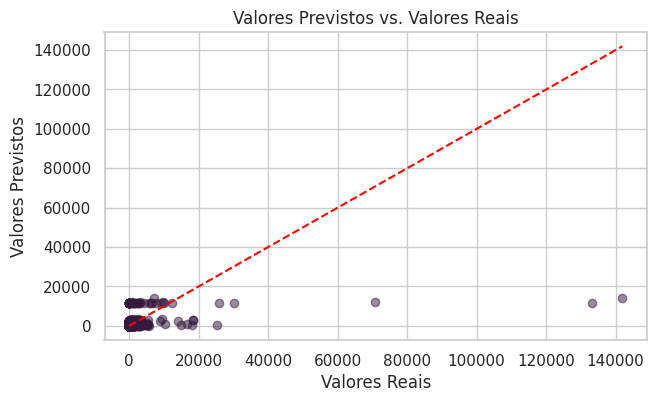

In [481]:

# Plot the residuals
plt.figure(figsize=(7, 4))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Ajustados')
plt.xscale('log')
plt.yscale('log')

plt.axhline(y=0, color='r', linestyle='--')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--') # Adiciona a linha de referência
plt.show()

# Calculate predicted values
y_pred = model.predict(X)

# Plot predicted vs actual values
plt.figure(figsize=(7, 4))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Previstos vs. Valores Reais')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--') # Adiciona a linha de referência
plt.show()


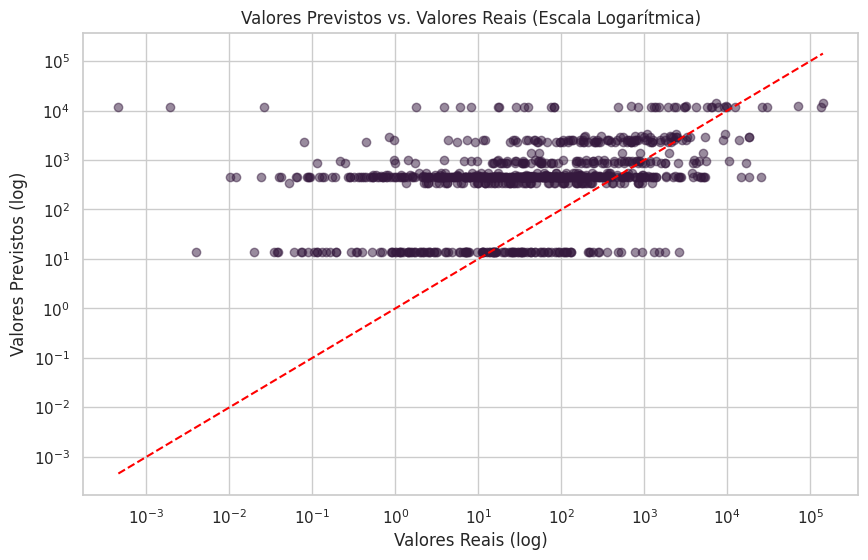

In [474]:
# prompt: REFAÇA O GRÁFICO DA REGRESSÃO MÚLTIPLA mas dessa vez em log para melhor visualização

import matplotlib.pyplot as plt

# ... (Your existing code)

# Calculate predicted values
y_pred = model.predict(X)

# Plot predicted vs actual values with log scale
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Valores Reais (log)')
plt.ylabel('Valores Previstos (log)')
plt.title('Valores Previstos vs. Valores Reais (Escala Logarítmica)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--') # Adiciona a linha de referência
plt.xscale('log')
plt.yscale('log')
plt.show()


In [437]:
# Reiniciar a tabela
df= pd.read_csv(path + "/Methane_final.csv", sep=",")

col_pt = {
    'Unnamed: 0': 'Id',
    'region': 'Regiao',
    'country': 'Pais',
    'emissions': 'Emissao_kt',
    'type': 'Origem',
    'segment': 'Especificacao',
    'reason': 'Motivo',
    'baseYear': 'Ano_Base',
    'notes': 'Observacoes'
}

# Renomeando as colunas
df = df.rename(columns=col_pt)

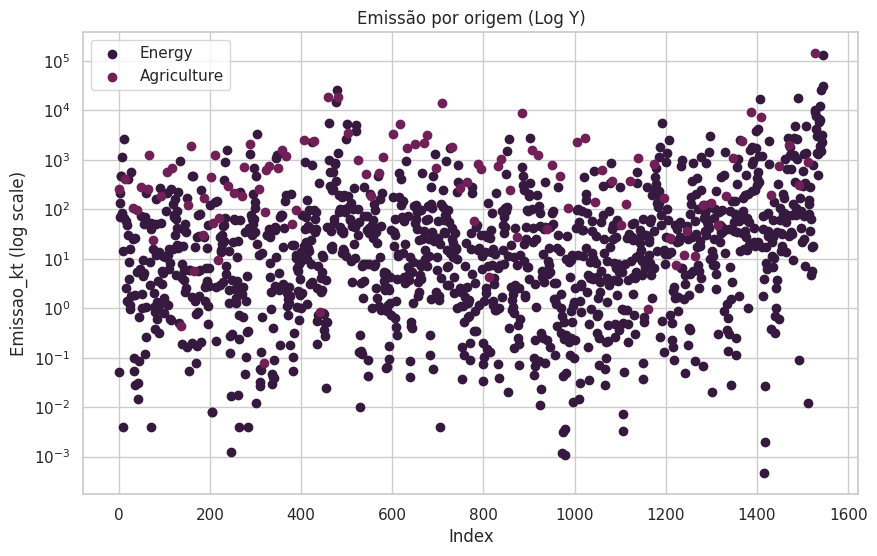

In [439]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for origin in ['Energy', 'Agriculture']:
  subset = df[df['Origem'] == origin]
  plt.scatter(subset.index, subset['Emissao_kt'], label=origin)

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Index')
plt.ylabel('Emissao_kt (log scale)')
plt.title('Emissão por origem (Log Y)')
plt.legend()
plt.grid(True)
plt.show()


# Interpretação dos Resultados
## Coeficientes
Na análise de regressão realizada, temos os seguintes coeficientes:

## Intercepto (const):
O coeficiente do intercepto é 1.211e+04, ou seja, o valor base das emissões de metano quando todas as variáveis independentes (x1, x2, ..., x9) são zero. Isso pode ser interpretado como o valor esperado para as emissões de metano na ausência de outros fatores, ou seja, quando as características de setor, região, e especificações são iguais a suas categorias de referência.

Este valor também pode ser visto como o valor base, representando as emissões médias de metano sem a influência das variáveis explicativas.

# Coeficientes das Variáveis Independentes:

- x1 (Coeficiente = 1999.5842): Esse coeficiente indica que, para cada unidade adicional na variável x1 (que pode representar, por exemplo, uma variável de controle como tipo de setor), as emissões de metano aumentam em 1999.58 unidades (kt). O valor-p associado a essa variável é 0.001, o que indica que ela é estatisticamente significativa a um nível de 0.05.
-x2 (Coeficiente = -532.3729): Este coeficiente negativo sugere que para cada unidade adicional em x2, as emissões de metano diminuem em 532.37 unidades. No entanto, o valor-p de 0.173 sugere que essa variável não é estatisticamente significativa (não rejeitamos a hipótese nula a um nível de 0.05).
-x3 a x9 (Coeficientes negativos): As variáveis x3 a x9 apresentam coeficientes negativos, o que indica que aumentos nessas variáveis estão associados a uma diminuição nas emissões de metano. Todos esses coeficientes são altamente significativos, com valores-p muito baixos (p < 0.05), indicando que essas variáveis têm um impacto significativo nas emissões de metano.

# R²
O R² do modelo é 0.129, o que significa que aproximadamente 12.9% da variação nas emissões de metano pode ser explicada pelas variáveis independentes incluídas no modelo. Embora este valor seja relativamente baixo, ele sugere que há outros fatores não incluídos no modelo que também influenciam as emissões de metano, e mais variáveis poderiam ser necessárias para explicar a variação nas emissões de forma mais robusta.

O R² ajustado (0.124), que leva em consideração o número de variáveis independentes no modelo, também é baixo, o que implica que a qualidade do ajuste não é excelente, e o modelo pode ser melhorado.

# Conclusão da Análise
Com base nos resultados da regressão, podemos concluir que, enquanto as variáveis selecionadas têm efeitos significativos nas emissões de metano, a qualidade do ajuste do modelo não é excepcional. A maior parte da variação nas emissões de metano permanece não explicada por esse conjunto de variáveis.

## Principais Pontos:
- Coeficientes Significativos: Variáveis como x1 (setor de atividade) apresentam um impacto positivo significativo nas emissões, enquanto outras variáveis têm impactos negativos.
- R² Baixo: O R² de 12.9% indica que o modelo não explica a maior parte da variação das emissões de metano, sugerindo que outras variáveis não incluídas no modelo podem estar influenciando as emissões.

## Hipótese Principal:
"Há uma relação significativa entre as variáveis explicativas e as emissões de metano, e as variáveis selecionadas têm um impacto importante nas emissões."

## Hipótese
Com base nos resultados da análise, a hipótese principal foi corroborada. As variáveis independentes selecionadas têm um impacto significativo nas emissões de metano, mas o modelo poderia ser melhorado com a inclusão de mais variáveis explicativas.